# Assignment Number 4 (Last One)

In [1]:
import warnings
warnings.filterwarnings('ignore')

# 1

### Using Single-Link
#### Will focus on smallest 2 attributes distance, will find that smallest two are first 2 points, which are 0 and , so by merging them result will be 
#### ((0,1) , 2)
### so will firstly make 
### Using Complete-Link
#### Will focus on Max 2 attributes distance by focusing in smallest 2 and compare it with all, so smallest 2 are 0 and 1 together, compared with distnace between(2,0) then (2,1) will be max(3,4) = 4, then will find that will perform the same result as single with
#### ((0,1) , 2)
### so will firstly make 

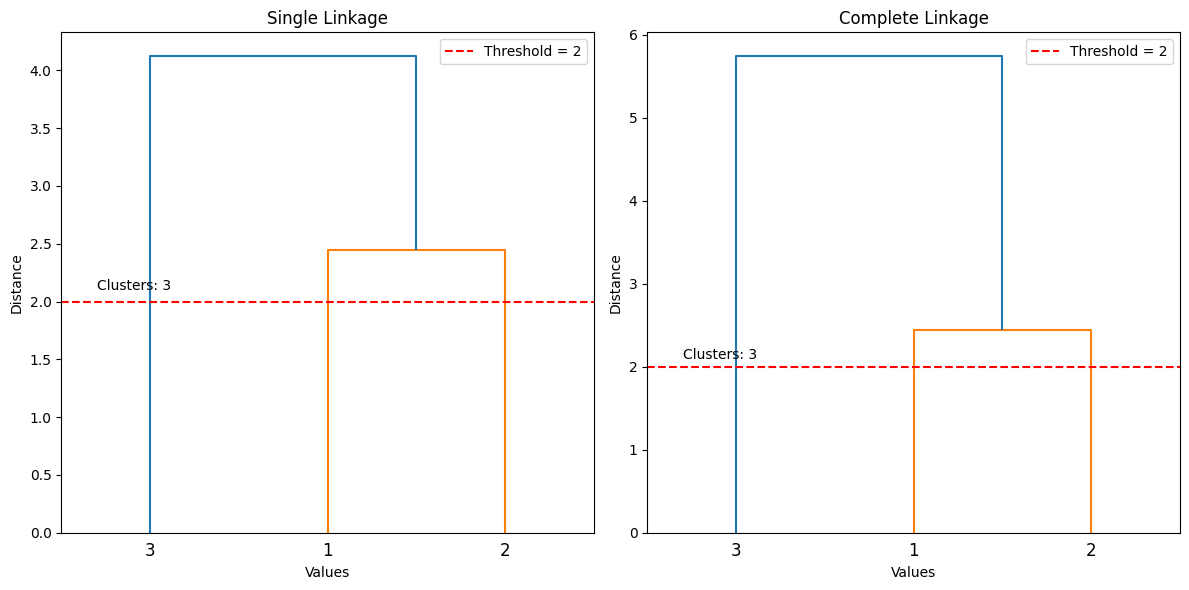

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Given dissimilarity matrix
P_X = np.array([[0, 1, 4], [1, 0, 2], [4, 2, 0]])
threshold = int(input("Set Threshold for proper: "))

# Perform hierarchical clustering using single linkage
Z_single = linkage(P_X, method="single")

# Perform hierarchical clustering using complete linkage
Z_complete = linkage(P_X, method="complete")

# Use fcluster to assign cluster labels based on the threshold
clusters_single = fcluster(Z_single, t=threshold, criterion="distance")
clusters_complete = fcluster(Z_complete, t=threshold, criterion="distance")

# Plot dendrogram for single linkage
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
dendrogram(Z_single, labels=["1", "2", "3"])
plt.title("Single Linkage")
plt.xlabel("Values")
plt.ylabel("Distance")
# Draw a horizontal line at the specified threshold
plt.axhline(y=threshold, color="r", linestyle="--", label=f"Threshold = {threshold}")
plt.legend()
plt.text(2, threshold + 0.1, f"Clusters: {clusters_single[-1]}", color="black")

# Plot dendrogram for complete linkage
plt.subplot(1, 2, 2)
dendrogram(Z_complete, labels=["1", "2", "3"])
plt.title("Complete Linkage")
plt.xlabel("Values")
plt.ylabel("Distance")
# Draw a horizontal line at the specified threshold
plt.axhline(y=threshold, color="r", linestyle="--", label=f"Threshold = {threshold}")
plt.legend()
plt.text(2,threshold + 0.1, f"Clusters: {clusters_complete[-1]}", color="black")

plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
# Calculate Euclidean distances without using np.linalg.norm
distance_to_C1 = np.sqrt((P_X[2, 0] - P_X[0, 0]) ** 2 + (P_X[2, 1] - P_X[0, 1]) ** 2)
distance_to_C2 = np.sqrt((P_X[2, 0] - P_X[1, 0]) ** 2 + (P_X[2, 1] - P_X[1, 1]) ** 2)

# Create a DataFrame for the distances
distances_df = pd.DataFrame(
    {"Cluster C1": [distance_to_C1], "Cluster C2": [distance_to_C2]}
)

# Print the distances DataFrame
print("Euclidean Distances:")
print(distances_df)

# Determine cluster membership
belongs_to_C1 = distance_to_C1 < distance_to_C2

# Print the cluster membership
cluster_membership = (
    "Belongs to Cluster C1" if belongs_to_C1 else "Belongs to Cluster C2"
)
print("Cluster Membership:", cluster_membership)

# Accessing hard membership for a specific object (e.g., object with index 2)
object_index = 2
hard_membership_for_object = "C1" if belongs_to_C1 else "C2"
print(f"Hard Membership for Object {object_index}: {hard_membership_for_object}")

Euclidean Distances:
   Cluster C1  Cluster C2
0    4.123106    3.605551
Cluster Membership: Belongs to Cluster C2
Hard Membership for Object 2: C2


In [4]:
import numpy as np
import pandas as pd
from scipy.spatial import distance

# Given points
X1 = np.array([1, 3])
X2 = np.array([2, 5])
X3 = np.array([3, 7])

# Given clusters
C1 = np.array([0, 1, 4])
C2 = np.array([1, 0, 2])

# Create an array with all the points
points = np.array([X1, X2, X3])

# Compute the pairwise distances using cdist
idx_points = ["X1", "X2", "X3"]
idx_clusters = ["C1", "C2"]
distance_matrix_df = pd.DataFrame(
    distance.cdist(points, points), index=idx_points, columns=idx_points
)

# Print the distance matrix
print(f"Pairwise Distances:\n{distance_matrix_df}")

# Calculate distances and assign membership
hard_membership_matrix = distance.cdist(
    [C1, C2], distance_matrix_df, metric="euclidean"
)
hard_membership_matrix_df = pd.DataFrame(
    hard_membership_matrix.T, index=idx_points, columns=idx_clusters
)
# Add a new column 'Position' based on the cluster with minimum distance
hard_membership_matrix_df["Position"] = np.where(
    hard_membership_matrix_df["C1"] < hard_membership_matrix_df["C2"], "C1", "C2"
)
print(hard_membership_matrix_df)
# Calculate new means for C1 and C2 based on cluster assignments
new_C1 = np.mean(points[hard_membership_matrix_df["Position"] == "C1"], axis=0)
new_C2 = np.mean(points[hard_membership_matrix_df["Position"] == "C2"], axis=0)

# Print the new centroids for C1 and C2
print(f"\nNew Centroid for C1: {new_C1}")
print(f"New Centroid for C2: {new_C2}")

Pairwise Distances:
          X1        X2        X3
X1  0.000000  2.236068  4.472136
X2  2.236068  0.000000  2.236068
X3  4.472136  2.236068  0.000000
          C1        C2 Position
X1  1.323169  3.480152       C1
X2  3.018519  1.258409       C2
X3  6.125999  4.588652       C2

New Centroid for C1: [1. 3.]
New Centroid for C2: [2.5 6. ]


# 2

In [5]:
import numpy as np
from sklearn.cluster import DBSCAN

data = np.array([[1, 1, 0], [1, 2, 0], [1, 3, 0], [2, 2, 0], [3, 3, 0], [3, 4, 0], [4, 3, 0], [4, 4, 0]])

# Perform DBSCAN clustering
eps = 1.0
min_samples = 2
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(data)

# Print the cluster labels
for i, label in enumerate(labels):
    print(f"Point {data[i]} is assigned to cluster {label}")

Point [1 1 0] is assigned to cluster 0
Point [1 2 0] is assigned to cluster 0
Point [1 3 0] is assigned to cluster 0
Point [2 2 0] is assigned to cluster 0
Point [3 3 0] is assigned to cluster 1
Point [3 4 0] is assigned to cluster 1
Point [4 3 0] is assigned to cluster 1
Point [4 4 0] is assigned to cluster 1


# 3

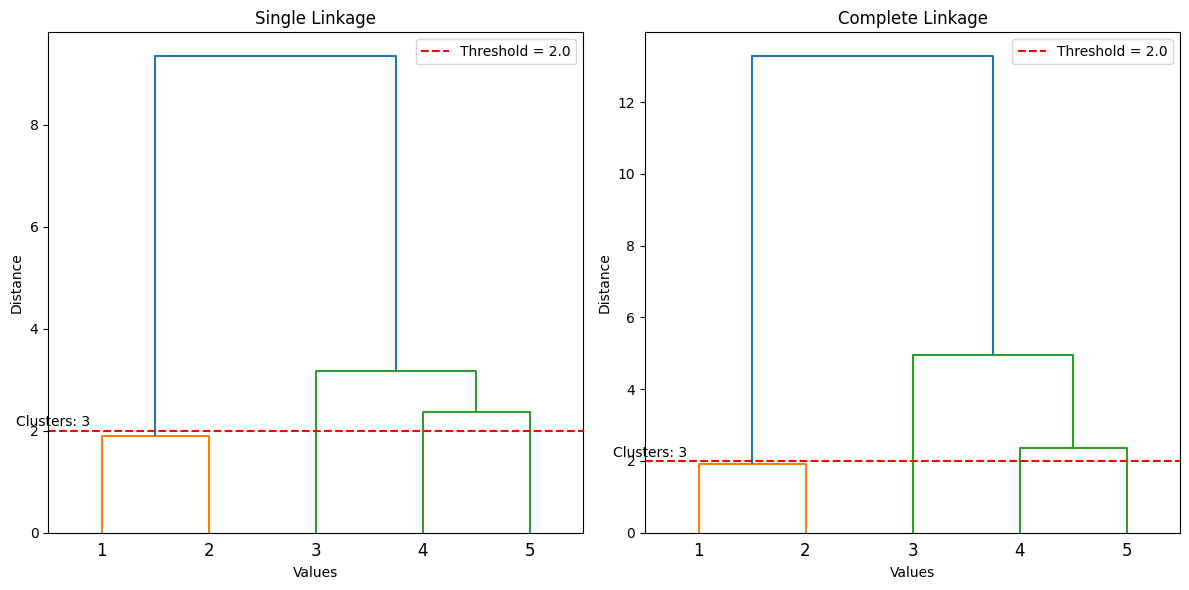

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Updated dissimilarity matrix
P_X = np.array(
    [
        [0, 1, 5, 6.4, 7.4],
        [1, 0, 4.2, 5.7, 6.7],
        [5, 4.2, 0, 1.4, 2.5],
        [6.4, 5.7, 1.4, 0, 1.1],
        [7.4, 6.7, 2.5, 1.1, 0],
    ]
)

threshold = float(input("Set Threshold for proper: "))

# Perform hierarchical clustering using single linkage
Z_single = linkage(P_X, method="single")

# Perform hierarchical clustering using complete linkage
Z_complete = linkage(P_X, method="complete")

# Use fcluster to assign cluster labels based on the threshold
clusters_single = fcluster(Z_single, t=threshold, criterion="distance")
clusters_complete = fcluster(Z_complete, t=threshold, criterion="distance")

# Plot dendrogram for single linkage
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
dendrogram(Z_single, labels=["1", "2", "3", "4", "5"])
plt.title("Single Linkage")
plt.xlabel("Values")
plt.ylabel("Distance")
# Draw a horizontal line at the specified threshold
plt.axhline(y=threshold, color="r", linestyle="--", label=f"Threshold = {threshold}")
plt.legend()
# Center the text on the x-axis
plt.text(
    0.5, threshold + 0.1, f"Clusters: {clusters_single[-1]}", color="black", ha="center"
)

# Plot dendrogram for complete linkage
plt.subplot(1, 2, 2)
dendrogram(Z_complete, labels=["1", "2", "3", "4", "5"])
plt.title("Complete Linkage")
plt.xlabel("Values")
plt.ylabel("Distance")
# Draw a horizontal line at the specified threshold
plt.axhline(y=threshold, color="r", linestyle="--", label=f"Threshold = {threshold}")
plt.legend()
# Center the text on the x-axis
plt.text(
    0.5,
    threshold + 0.1,
    f"Clusters: {clusters_complete[-1]}",
    color="black",
    ha="center",
)

plt.tight_layout()
plt.show()

# 6

In [1]:
import pandas as pd
# Create a DataFrame from the table data
data = {
    "ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "INCOME": [
        "95K",
        "120K",
        "140K",
        "80K",
        "160K",
        "100K",
        "90K",
        "75K",
        "170K",
        "125K",
    ],
    "MARITAL STATUS": ["M", "S", "S", "M", "D", "M", "S", "D", "D", "S"],
    "REFUND": ["Y", "Y", "N", "N", "Y", "Y", "Y", "N", "N", "N"],
    "ACTUAL CLASS": [-1, -1, 1, -1, -1, -1, -1, -1, 1, 1],
    "PREDICTED CLASS": [1, -1, 1, -1, 1, -1, 1, -1, 1, -1],
}
df = pd.DataFrame(data)
# Calculate the confusion matrix
TP = ((df["ACTUAL CLASS"] == 1) & (df["PREDICTED CLASS"] == 1)).sum()
TN = ((df["ACTUAL CLASS"] == -1) & (df["PREDICTED CLASS"] == -1)).sum()
FP = ((df["ACTUAL CLASS"] == -1) & (df["PREDICTED CLASS"] == 1)).sum()
FN = ((df["ACTUAL CLASS"] == 1) & (df["PREDICTED CLASS"] == -1)).sum()
# Calculate accuracy, sensitivity, and specificity
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
# Print the results
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Accuracy: 0.6
Sensitivity: 0.6666666666666666
Specificity: 0.5714285714285714


# 8

In [7]:
# Given test data
test_data = [
    [65, 57, 54, 1],
    [45, 65, 48, -1],
    [70, 46, 62, -1],
    [48, 91, 87, 1],
    [61, 33, 38, 1],
    [66, 59, 76, -1],
    [58, 84, 53, 1]
]

# Model M1
TP_M1 = sum(1 for a, b, c, cls in test_data if a > 60 and b > 60 and cls == 1)
TN_M1 = sum(1 for a, b, c, cls in test_data if not (a > 60 and b > 60) and cls == -1)
FP_M1 = sum(1 for a, b, c, cls in test_data if not (a > 60 and b > 60) and cls == 1)
FN_M1 = sum(1 for a, b, c, cls in test_data if a > 60 and b > 60 and cls == -1)

# Model M2
TP_M2 = sum(1 for a, b, c, cls in test_data if a > 55 and c > 65 and cls == 1)
TN_M2 = sum(1 for a, b, c, cls in test_data if not (a > 55 and c > 65) and cls == -1)
FP_M2 = sum(1 for a, b, c, cls in test_data if not (a > 55 and c > 65) and cls == 1)
FN_M2 = sum(1 for a, b, c, cls in test_data if a > 55 and c > 65 and cls == -1)

# Calculating Accuracy, Sensitivity, Specificity for M1
accuracy_M1 = (TP_M1 + TN_M1) / len(test_data)
sensitivity_M1 = TP_M1 / (TP_M1 + max(FN_M1, 1))  # Avoiding division by zero by using max(FN_M1, 1)
specificity_M1 = TN_M1 / (TN_M1 + FP_M1)

# Calculating Accuracy, Sensitivity, Specificity for M2
accuracy_M2 = (TP_M2 + TN_M2) / len(test_data)
sensitivity_M2 = TP_M2 / (TP_M2 + max(FN_M2, 1))  # Avoiding division by zero by using max(FN_M2, 1)
specificity_M2 = TN_M2 / (TN_M2 + FP_M2)

# Displaying results for Model M1
print("Results for Model M1:")
print(f"Accuracy: {accuracy_M1:.2f}")
print(f"Sensitivity: {sensitivity_M1:.2f}")
print(f"Specificity: {specificity_M1:.2f}\n")

# Displaying results for Model M2
print("Results for Model M2:")
print(f"Accuracy: {accuracy_M2:.2f}")
print(f"Sensitivity: {sensitivity_M2:.2f}")
print(f"Specificity: {specificity_M2:.2f}")


Results for Model M1:
Accuracy: 0.43
Sensitivity: 0.00
Specificity: 0.43

Results for Model M2:
Accuracy: 0.29
Sensitivity: 0.00
Specificity: 0.33


# 9

In [8]:
from sklearn.neighbors import KNeighborsRegressor

# Given data
data = [
    [25, 40000, 135],
    [35, 60000, 256],
    [45, 80000, 231],
    [20, 20000, 267],
    [35, 120000, 139],
    [52, 18000, 150],
    [23, 95000, 127],
    [40, 62000, 216],
    [60, 100000, 139],
    [48, 220000, 250],
    [33, 150000, 264]
]

# Test data (Age=38, Loan=$55,000)
test_point = [[38, 55000]]

# Extract features and target
X = [row[:-1] for row in data]
y = [row[-1] for row in data]

# Create kNN regressor model
k = 3
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X, y)

# Predict House Price Index
predicted_house_price = knn.predict(test_point)

print(f"Predicted House Price Index: {predicted_house_price[0]}")


Predicted House Price Index: 202.33333333333334


# 12

In [9]:
import pandas as pd
import math

# Given training set
data = {
    'Income': ['95K', '120K', '140K', '80K', '160K', '100K', '90K', '75K', '170K', '125K'],
    'Marital Status': ['Married', 'Single', 'Single', 'Married', 'Divorced', 'Married', 'Single', 'Divorced', 'Divorced', 'Single'],
    'Refund': ['Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No'],
    'Cheat': ['NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO']
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Calculate Entropy for 'Cheat' (Class Label)
def entropy(class_values):
    counts = class_values.value_counts(normalize=True)
    entropy_value = -sum(p * math.log2(p) for p in counts)
    return entropy_value

class_entropy = entropy(df['Cheat'])

# Calculate Information Gain for 'Refund' and 'Marital Status'
def information_gain(df, attribute, target):
    attribute_entropy = df.groupby(attribute)[target].apply(entropy)
    subset_sizes = df[attribute].value_counts(normalize=True)
    weighted_entropy = (subset_sizes * attribute_entropy).sum()
    return class_entropy - weighted_entropy

# Calculate Information Gain for 'Refund' and 'Marital Status'
gain_refund = information_gain(df, 'Refund', 'Cheat')
gain_marital_status = information_gain(df, 'Marital Status', 'Cheat')

print(f"Information Gain for Refund: {gain_refund}")
print(f"Information Gain for Marital Status: {gain_marital_status}")

Information Gain for Refund: 0.3958156020033584
Information Gain for Marital Status: 0.2812908992306927


# 13

In [31]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd

# Training data
data = {
    "age": [">40", ">40", ">40", "<=30", "<=30", ">40"],
    "income": ["medium", "low", "low", "medium", "low", "medium"],
    "student": ["no", "yes", "yes", "no", "yes", "yes"],
    "credit_rating": ["fair", "fair", "excellent", "fair", "fair", "fair"],
    "buys_computer": ["yes", "yes", "no", "no", "yes", "yes"],
}

# Convert data to a DataFrame and one-hot encode categorical variables
df = pd.get_dummies(
    pd.DataFrame(data), columns=["age", "income", "student", "credit_rating"]
)

# Train the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB().fit(df.drop("buys_computer", axis=1), df["buys_computer"])

# Unseen sample for prediction
unseen_df = pd.DataFrame(
    {
        "age_<=30": [0],
        "age_>40": [1],
        "income_low": [1],
        "income_medium": [0],
        "student_no": [1],
        "student_yes": [0],
        "credit_rating_excellent": [0],
        "credit_rating_fair": [1],
    }
)

# Make predictions and display the result
print("Prediction for unseen sample:", nb_classifier.predict(unseen_df))

Prediction for unseen sample: ['yes']


# 13 Newtork

Number of nodes: 4
Number of edges: 2
Nodes: [(1, {}), (2, {}), (3, {}), ('a', {'label': 'Node a'})]
Edges: [(1, 2, {'label': 'Edge 1-2'}), (1, 3, {'label': 'Edge 1-3'})]
Neighbors of node 1: [2, 3]
Degree of node 1: 2


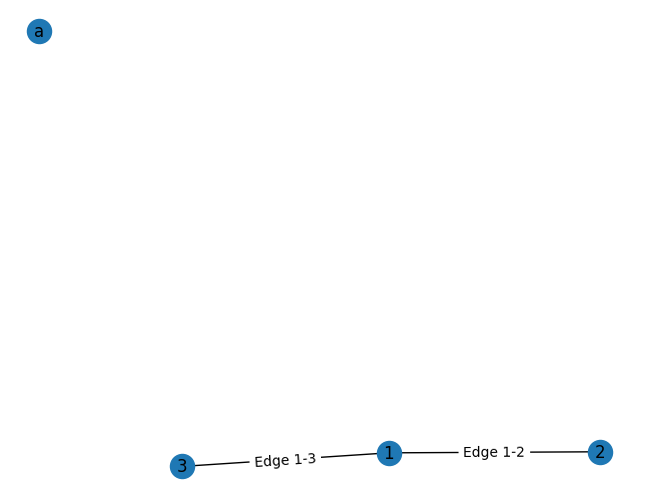

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
# Create a graph
g = nx.Graph()
# Add nodes and edges with labels
g.add_edges_from([(1, 2, {"label": "Edge 1-2"}), (1, 3, {"label": "Edge 1-3"})])
g.add_node("a", label="Node a")
# Display number of nodes and edges
print("Number of nodes:", g.number_of_nodes())
print("Number of edges:", g.number_of_edges())
# Display nodes and edges
print("Nodes:", g.nodes(data=True))
print("Edges:", g.edges(data=True))
# Display neighbors and degree of node 1
print("Neighbors of node 1:", list(g.neighbors(1)))
print("Degree of node 1:", g.degree(1))
# Draw the graph
pos = nx.spring_layout(g)  # Set layout for better visualization
nx.draw(g, pos, with_labels=True)
labels = nx.get_edge_attributes(g, "label")
nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)
plt.show()

# 14

Weighted out-degree of node 1: 0.5
Weighted degree of node 1: 1.25
Successors of node 1: [4]
Predecessors of node 1: [3]


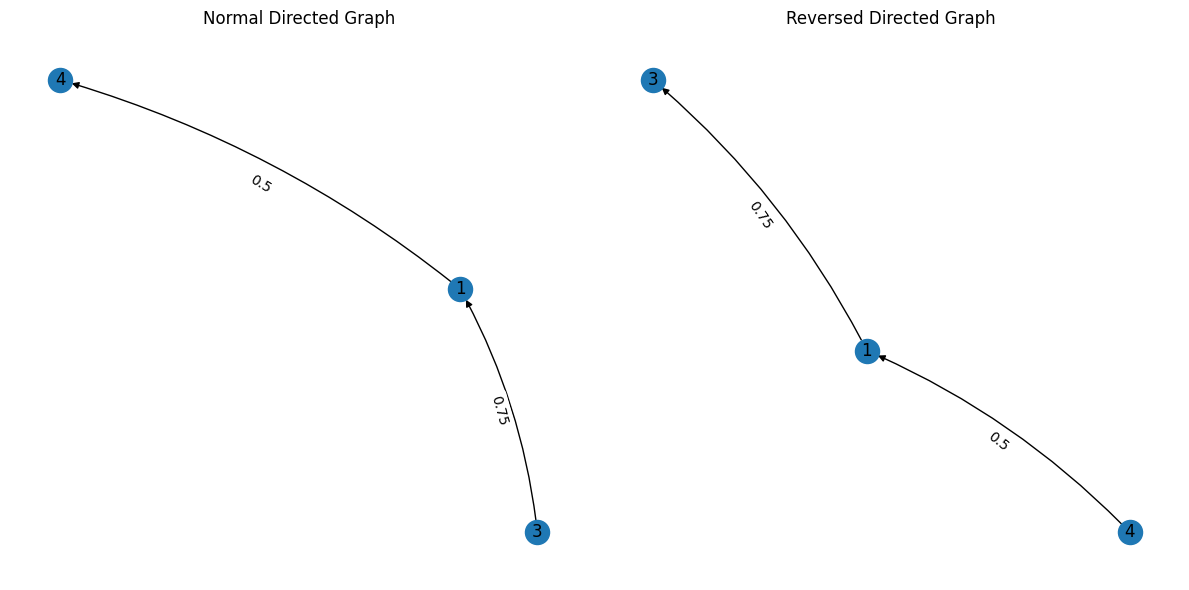

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
dg = nx.DiGraph()

# Add weighted edges
dg.add_weighted_edges_from([(1, 4, 0.5), (3, 1, 0.75)])

# Display weighted out-degree and degree of node 1
print("Weighted out-degree of node 1:", dg.out_degree(1, weight="weight"))
print("Weighted degree of node 1:", dg.degree(1, weight="weight"))

# Display successors and predecessors of node 1
print("Successors of node 1:", list(dg.successors(1)))
print("Predecessors of node 1:", list(dg.predecessors(1)))

# Reverse the direction of edges
dg_reverse = dg.reverse()

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the normal directed graph
axs[0].set_title("Normal Directed Graph")
pos = nx.spring_layout(dg)  # Set layout for better visualization
nx.draw(dg, pos, with_labels=True, connectionstyle="arc3,rad=0.1", ax=axs[0])
labels = nx.get_edge_attributes(dg, "weight")
nx.draw_networkx_edge_labels(dg, pos, edge_labels=labels, ax=axs[0])

# Plot the reversed directed graph
axs[1].set_title("Reversed Directed Graph")
pos_reverse = nx.spring_layout(dg_reverse)  # Set layout for better visualization
nx.draw(
    dg_reverse, pos_reverse, with_labels=True, connectionstyle="arc3,rad=0.1", ax=axs[1]
)
labels_reverse = nx.get_edge_attributes(dg_reverse, "weight")
nx.draw_networkx_edge_labels(
    dg_reverse, pos_reverse, edge_labels=labels_reverse, ax=axs[1]
)

# Adjust layout
plt.tight_layout()
plt.show()

# 14 Output Network

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

# Small famous graphs
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

# Classic graphs
K_5 = nx.complete_graph(5)
barbell = nx.barbell_graph(10, 10)
K_3_5 = nx.complete_bipartite_graph(3, 5)
lollipop = nx.lollipop_graph(10, 20)

# Random graphs
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

# Displaying all graphs
graphs = [petersen, tutte, maze, tet, K_5, barbell, K_3_5, lollipop, er, ws, ba, red]
graphs_string = [
    "petersen",
    "tutte",
    "maze",
    "tet",
    "K_5",
    "barbell",
    "K_3_5",
    "lollipop",
    "er",
    "ws",
    "ba",
    "red",
]

for i, graph in enumerate(graphs):
    print(
        f"Name of graph is {graphs_string[i]} with {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges."
    )

Name of graph is petersen with 10 nodes and 15 edges.
Name of graph is tutte with 46 nodes and 69 edges.
Name of graph is maze with 8 nodes and 10 edges.
Name of graph is tet with 4 nodes and 6 edges.
Name of graph is K_5 with 5 nodes and 10 edges.
Name of graph is barbell with 30 nodes and 101 edges.
Name of graph is K_3_5 with 8 nodes and 15 edges.
Name of graph is lollipop with 30 nodes and 65 edges.
Name of graph is er with 100 nodes and 741 edges.
Name of graph is ws with 30 nodes and 30 edges.
Name of graph is ba with 100 nodes and 475 edges.
Name of graph is red with 15144 nodes and 15143 edges.


In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Various Graphs")
for i, ax in enumerate(axes.flatten()):
    ax.set_title(f"Graph {i + 1}")
    nx.draw(graphs[i], ax=ax, with_labels=True, node_size=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 15

In [14]:
import random
# Specify the number of nodes and edges
num_nodes = 20
num_edges = 70
# Generate edges with random weights
edges = [
    (
        random.randint(1, num_nodes),
        random.randint(1, num_nodes),
        random.uniform(0.1, 1.0),
    )
    for _ in range(num_edges)
]
# Write the edges with weights to the file
with open("my_file.txt", "w") as file:
    for edge in edges:
        file.write(f"{edge[0]} {edge[1]} {edge[2]}\n")
print(f"Generated {num_nodes} nodes and {num_edges} edges with weights in my_file.txt.")

Generated 20 nodes and 70 edges with weights in my_file.txt.


# 16

Nodes: 20
Edges: 63
Average degree (considering weights): 3.4450822830579755


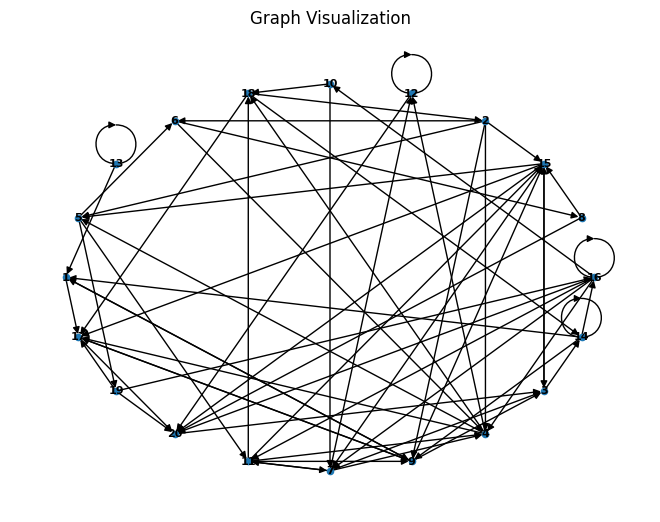

In [15]:
import networkx as nx

# Replace the dataset in the following code by any of your choice and print nodes, edges count, and average degree
my_file = nx.read_edgelist(
    "my_file.txt", create_using=nx.DiGraph(), nodetype=int, data=(("weight", float),)
)
# Print the number of nodes
print(f"Nodes: {my_file.number_of_nodes()}")

# Print the number of edges
print(f"Edges: {my_file.number_of_edges()}")

# Calculate and print the average degree considering weights
average_degree_with_weights = (
    sum(dict(my_file.degree(weight="weight")).values()) / my_file.number_of_nodes()
)
print(f"Average degree (considering weights): {average_degree_with_weights}")

# Plot the graph
pos = nx.shell_layout(my_file)  
nx.draw(
    my_file,
    pos,
    with_labels=True,
    node_size=20,
    font_size=8,
    font_color="black",
    font_weight="bold",
)

# Show the plot
plt.title("Graph Visualization")
plt.show()

Before Adding The new node from e to c, and e to a with 0.9 and 1.3 respecitvely
Without Weights ['b', 'c', 'd']
With Weights ['b', 'a', 'c', 'd']


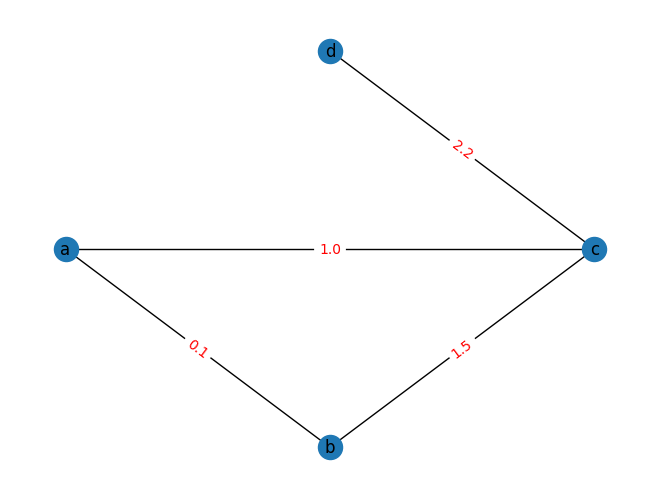

after Adding The new node from e to c, and e to a with 0.9 and 1.3 respecitvely
Without Weights ['a', 'c', 'd']
With Weights ['a', 'c', 'd']
with minimum_spanning_tree [('a', 'b'), ('a', 'c'), ('c', 'e'), ('c', 'd')]


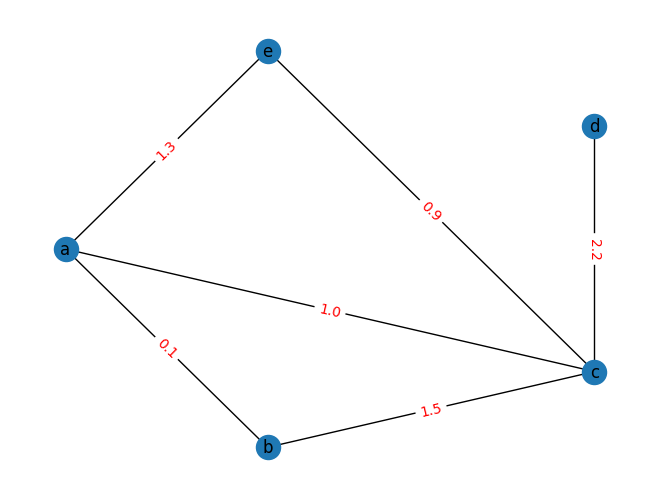

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
g = nx.Graph()
def before(g):
    # Add an edge with weight
    g.add_edge("a", "b", weight=0.1)
    g.add_edge("b", "c", weight=1.5)
    g.add_edge("a", "c", weight=1.0)
    g.add_edge("c", "d", weight=2.2)
    # Specify the layout for better visualization
    pos = nx.shell_layout(g)
    # Draw the graph with labels
    nx.draw(g, pos=pos, with_labels=True)
    # Add edge weights as attributes
    labels = nx.get_edge_attributes(g, "weight")
    nx.draw_networkx_edge_labels(g, pos, edge_labels=labels, font_color="red")
    # Shortest Path before
    print(
        "Before Adding The new node from e to c, and e to a with 0.9 and 1.3 respecitvely"
    )
    print(f'Without Weights {nx.shortest_path(g, "b", "d")}')
    print(f'With Weights {nx.shortest_path(g,'b','d',weight='weight')}')
    result = plt.show()
    return result

def after(g):
    # Add an edge with weight
    g.add_edge("a", "b", weight=0.1)
    g.add_edge("b", "c", weight=1.5)
    g.add_edge("a", "c", weight=1.0)
    g.add_edge("c", "d", weight=2.2)
    g.add_edge("e","c",weight=0.9)
    g.add_edge("e","a",weight=1.3)
    # Specify the layout for better visualization
    pos = nx.shell_layout(g)
    # Draw the graph with labels
    nx.draw(g, pos=pos, with_labels=True)
    # Add edge weights as attributes
    labels = nx.get_edge_attributes(g, "weight")
    nx.draw_networkx_edge_labels(g, pos, edge_labels=labels, font_color="red")
    # Shortest Path after
    print(
        "after Adding The new node from e to c, and e to a with 0.9 and 1.3 respecitvely"
    )
    print(f'Without Weights {nx.shortest_path(g, "a", "d")}')
    print(f'With Weights {nx.shortest_path(g,'a','d',weight='weight')}')
    mst = nx.minimum_spanning_tree(g)
    print(f"with minimum_spanning_tree {mst.edges()}")
    result = plt.show()
    return result

before_plot = before(g)
after_plot = after(g)